In [1]:
import torch
import torchvision

In [2]:
n_epochs = 8
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [4]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [5]:
example_data.shape

torch.Size([1000, 1, 28, 28])

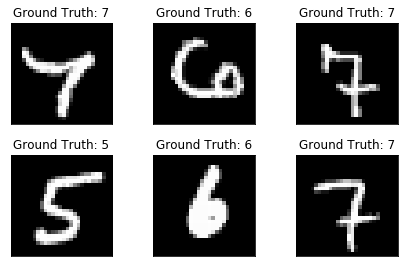

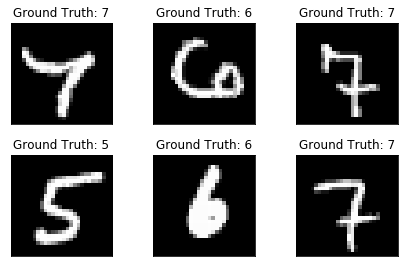

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [9]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [10]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [11]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

In [12]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [13]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\LENOVO\Anaconda3\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3004, Accuracy: 751/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.268458
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.268337
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.274000
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.251669
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.236826
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.223578
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.153440
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.096371
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.974112
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.944348
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.839604
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.765901
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.699960
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.691150
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.509484
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.395923
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.286210
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.321333
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.273633
Train Epoch: 1 [12160/6

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.376802
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.475891
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.448964
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.423854
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.245870
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.282166
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.515941
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.350320
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.378358
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.314007
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.291337
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.461737
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.179657
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.393396
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.403895
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.290036
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.328482
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.381642
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.664402
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.329930


Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.343401
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.239328
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.299167
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.216088
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.248535
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.292557
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.227046
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.113821
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.317627
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.309662
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.117615
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.564555
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.164140
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.435194
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.408130
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.404881
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.327664
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.176717
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.166788
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.186189


Train Epoch: 6 [12160/60000 (20%)]	Loss: 0.237032
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.203051
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.165452
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.229543
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.334835
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.117390
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.248557
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.252421
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.138452
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.116913
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.263336
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.130276
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.073029
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.137389
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.194884
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.182328
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.195005
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.346640
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.128650
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.302813


Train Epoch: 7 [56960/60000 (95%)]	Loss: 0.245699
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.217321
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.084110
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.197029
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.216427

Test set: Avg. loss: 0.0616, Accuracy: 9798/10000 (98%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.122427
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.121810
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.132057
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.268694
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.203167
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.296651
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.285513
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.118403
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.238999
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.089545
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.201245
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.274640
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.127739
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.272820
Train Epoch: 8 [896

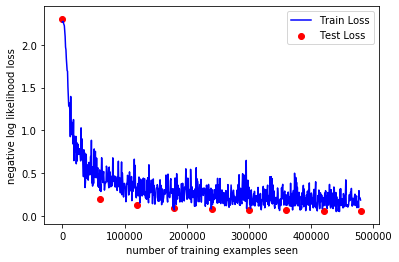

In [14]:
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')